In [10]:
import xarray as xr
import pandas as pd

dataset = xr.open_dataset('MiningProcess_Flotation_Plant_Database.h5', engine = 'h5netcdf')
df = dataset.to_pandas()


In [11]:
# Saving period of discontinuity
# df_discontinuity = df.loc["201703160600":"201703291200"]

# # Removing period of discontinuity from the dataframe
# df.loc["201703160600":"201703291200"] = pd.NA
# df.dropna( inplace = True )
df = df.resample('1h').mean()


In [12]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
2017-03-10 02:00:00,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2017-03-10 03:00:00,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
2017-03-10 04:00:00,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
2017-03-10 05:00:00,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,49.75,23.20,3327.047776,497.211189,380.847200,9.176166,1.660871,301.565561,300.169133,299.900722,...,298.736661,397.781583,498.753311,403.858956,398.930467,502.971728,399.468911,400.559511,65.05,1.65
2017-09-09 20:00:00,49.75,23.20,4225.800333,508.963856,381.112889,9.387541,1.691996,300.050172,299.967839,299.906550,...,303.599269,399.928567,499.648950,399.208611,399.967122,501.624533,398.905006,400.486233,64.83,1.71
2017-09-09 21:00:00,49.75,23.20,2808.214692,517.748822,381.064411,9.771277,1.735647,299.814289,299.801561,299.973161,...,309.875439,399.961433,500.484917,471.827489,399.931033,500.223311,401.899806,400.556333,64.29,1.80


In [13]:
df_input_feed = df.iloc[:,:2]
df_process_variables = df.iloc[:,2:-2]
df_output_feed = df.iloc[:,-2:]

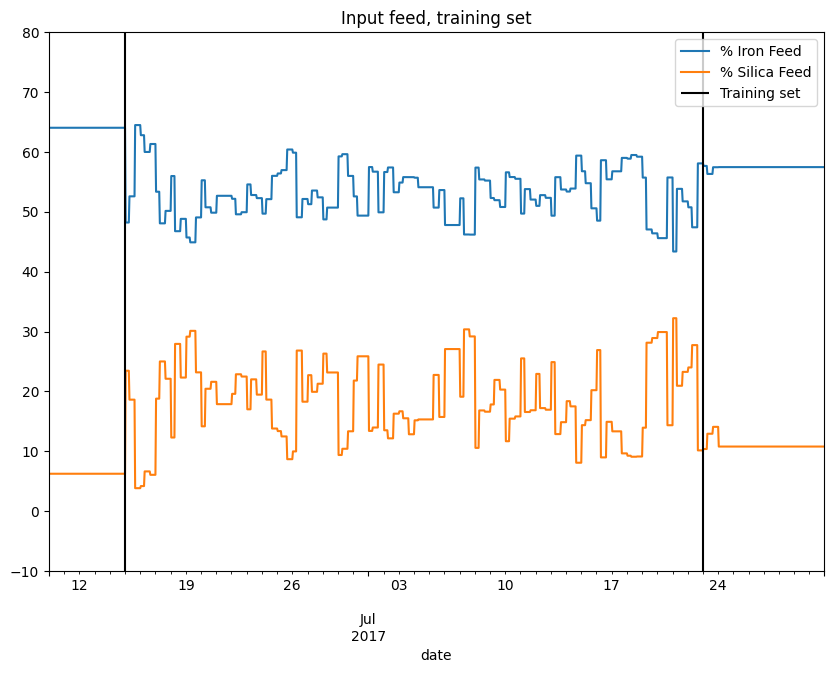

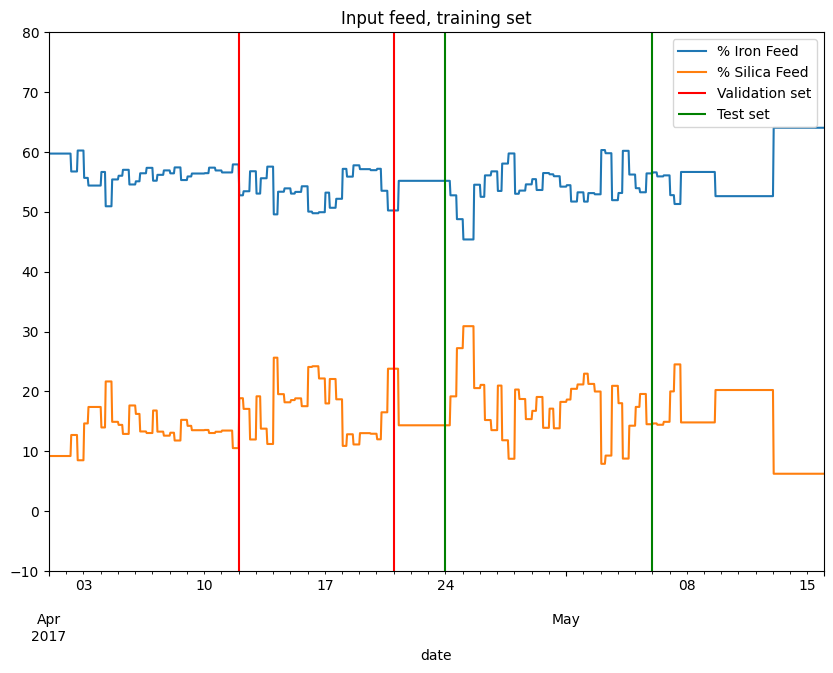

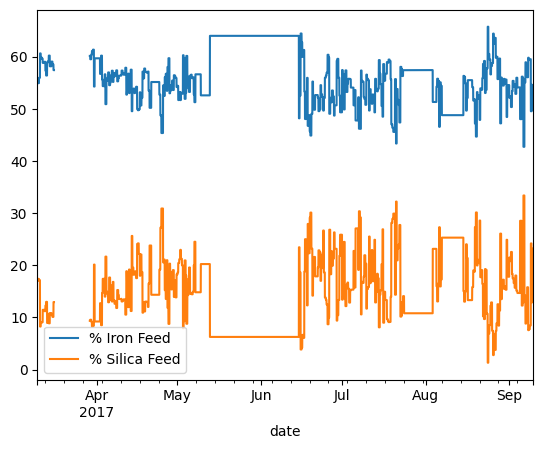

In [14]:
from matplotlib import pyplot as plt

df_input_feed['20170610':'20170730'].plot(figsize=(10,7))
plt.vlines('20170615',-10,80,colors='k',label='Training set')
plt.vlines('20170723',-10,80,colors='k')
plt.ylim(-10,80)
plt.title('Input feed, training set')
plt.legend()

df_input_feed['20170401':'20170515'].plot(figsize=(10,7))
plt.vlines(['20170412','20170421'],-10,80,colors='r',label='Validation set')
plt.vlines(['20170424','20170506'],-10,80,colors='g',label='Test set')
plt.ylim(-10,80)
plt.title('Input feed, training set')
plt.legend()
df_input_feed.plot()
# df_output_feed.plot()

df_train = df['20170615':'20170723']
df_test = df['20170424':'20170506']
df_validation = df['20170424':'20170506']

Starch Flow                       2
Amina Flow                        2
Ore Pulp Flow                     2
Ore Pulp pH                      11
Ore Pulp Density                  3
Flotation Column 01 Air Flow      7
Flotation Column 02 Air Flow      7
Flotation Column 03 Air Flow      7
Flotation Column 04 Air Flow    460
Flotation Column 05 Air Flow    460
Flotation Column 06 Air Flow      8
Flotation Column 07 Air Flow      8
Flotation Column 01 Level         4
Flotation Column 02 Level         2
Flotation Column 03 Level         2
Flotation Column 04 Level         2
Flotation Column 05 Level         3
Flotation Column 06 Level         2
Flotation Column 07 Level         2
dtype: int64

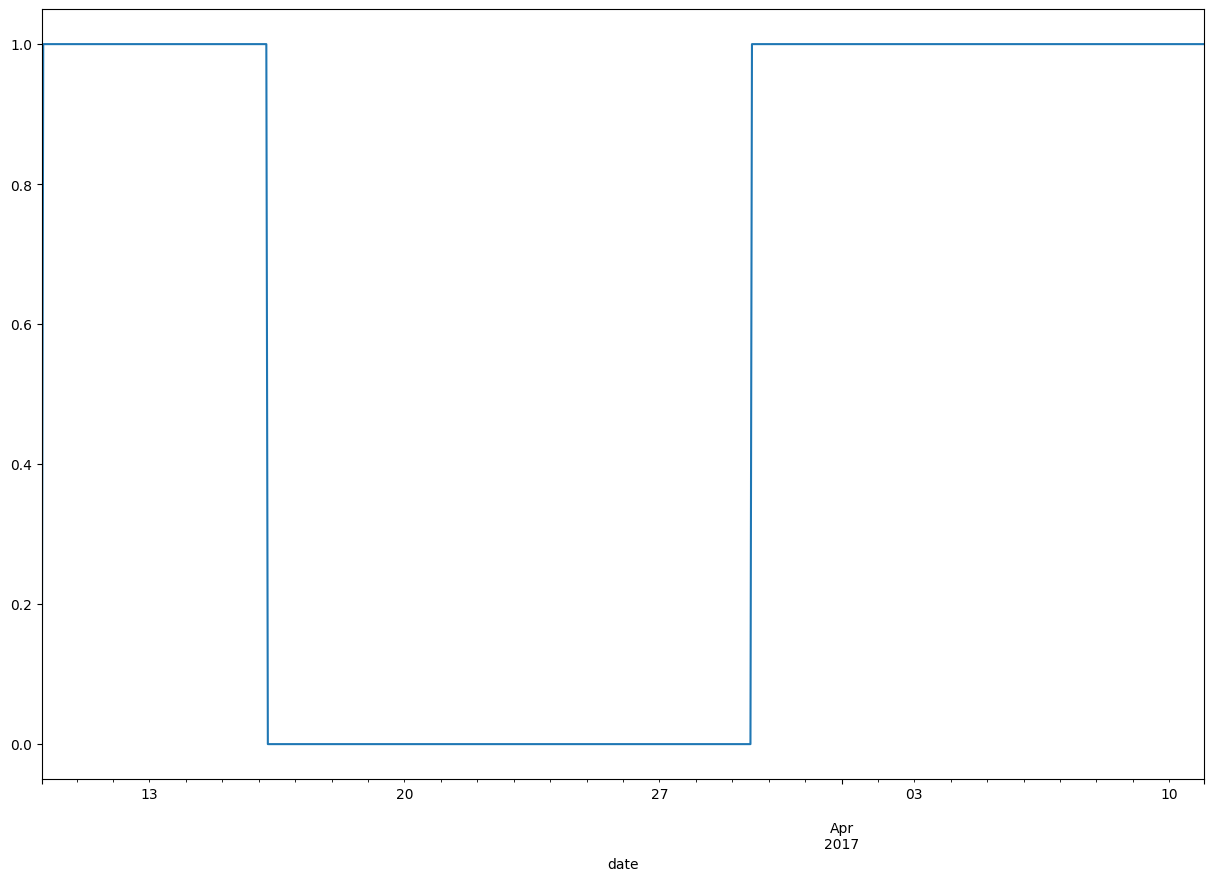

In [15]:
from matplotlib import pyplot as plt


df_missing = df_process_variables == df_process_variables.shift()

(df_missing.loc[:'20170410','Flotation Column 05 Air Flow']*1).plot(figsize=(15,10))

df_missing.sum()


In [16]:
## Normalization here:

In [17]:
# Save each DataFrame into the HDF5 file under different keys
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split.h5') as store:
    store.put('train_data', df_train)
    store.put('test_data', df_test)
    store.put('validation_data', df_validation)
